In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2026-01-14 17:21:37.697708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768411297.947902      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768411298.017762      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768411298.596413      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768411298.596497      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768411298.596500      17 computation_placer.cc:177] computation placer alr

In [2]:
data_dir = '/kaggle/input/gtsrb-german-traffic-sign'
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

IMG_HEIGHT = 30
IMG_WIDTH = 30
CHANNELS = 3
NUM_CATEGORIES = 43

print("Loading training data... this may take a minute.")

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)

    for img in images:
        try:
            img_path = os.path.join(path, img)
            image = Image.open(img_path)
            image = image.resize((IMG_WIDTH, IMG_HEIGHT))  
            image = np.array(image)

            # Ensure image has 3 channels
            if image.shape == (IMG_HEIGHT, IMG_WIDTH, CHANNELS):
                data.append(image)
                labels.append(i)

        except Exception as e:
            # Ignore corrupted images
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

print("Data loaded!")
print(f"Total images: {data.shape[0]}, Image shape: {data.shape[1:]}")


Loading training data... this may take a minute.
Data loaded!
Total images: 39209, Image shape: (30, 30, 3)


In [3]:
'''
Split the data using test_train_split into X_train, X_val, y_train, y_val and normalize the data

'''
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Normalize image data
X_train = X_train / 255.0
X_val = X_val / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, NUM_CATEGORIES)
y_val = to_categorical(y_val, NUM_CATEGORIES)

print("Train-validation split and preprocessing done.")


# TODO: One-hot encode the labels "y_train and y_val"

Train-validation split and preprocessing done.


In [4]:
# Write the CNN code below with Maxpool layer, dropout rate, flatten it
model = Sequential()

model.add(Conv2D(
    32, (5, 5),
    activation='relu',
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-14 17:26:43.815199: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 69ms/step - accuracy: 0.3872 - loss: 2.2566 - val_accuracy: 0.9464 - val_loss: 0.1968
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9093 - loss: 0.2904 - val_accuracy: 0.9797 - val_loss: 0.0748
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9507 - loss: 0.1640 - val_accuracy: 0.9892 - val_loss: 0.0463
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9620 - loss: 0.1197 - val_accuracy: 0.9883 - val_loss: 0.0464
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.9681 - loss: 0.1048 - val_accuracy: 0.9922 - val_loss: 0.0308
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9743 - loss: 0.0872 - val_accuracy: 0.9904 - val_loss: 0.0389
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9740 - loss: 0.0818 - val_accuracy: 0.9908 - val_loss: 0.0355
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.9770 - loss: 0.0771 - 

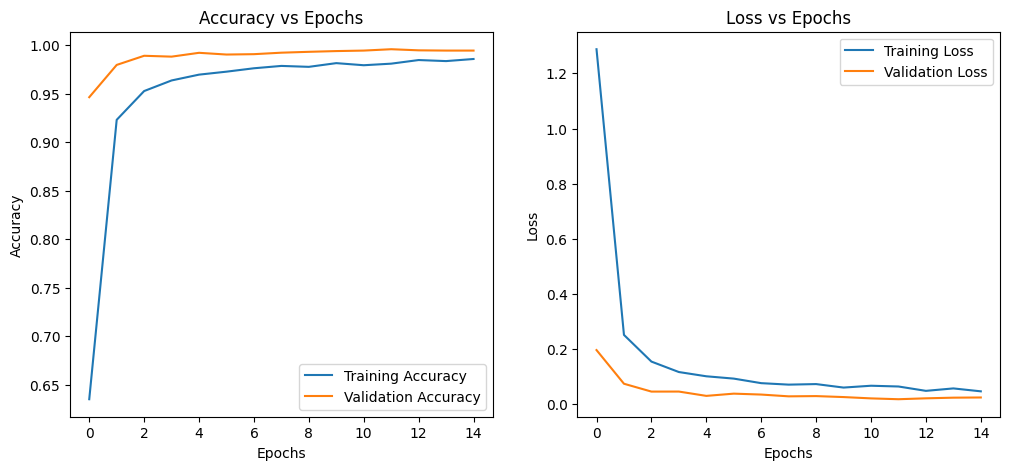

Loading test images...
395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Test Data Accuracy: 96.62%
Model saved successfully!


In [5]:
# Decide epochs and batch size which fits best for your model
epochs = 15
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Load test data
y_test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
labels_test = y_test['ClassId'].values
imgs = y_test['Path'].values

data_test = []

print("Loading test images...")
for img in imgs:
    image = Image.open(os.path.join(data_dir, img))
    image = image.resize((IMG_WIDTH, IMG_HEIGHT))  # width, height
    data_test.append(np.array(image))

X_test = np.array(data_test)
X_test = X_test / 255.0

# Predict
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)

from sklearn.metrics import accuracy_score
print(f"Test Data Accuracy: {accuracy_score(labels_test, pred_classes) * 100:.2f}%")

# Save the model
model.save("traffic_classifier.keras")
print("Model saved successfully!")
